# Task

A person is identified as a staff if s/he is wearing a staff name tag, as shown below. <br>
![](https://drive.google.com/uc?export=view&id=1p9Af7wiYMDFEg_KPITNufGCsUGCvj1yo)

You are given 1 sample (“sample.mp4”) which is the view from our 3D sensor. Within the clip, there is a person wearing the tag and walking along the corridor. Below are 2 snapshot instances of the person, all other people are not wearing the tag:<br>
![](https://drive.google.com/uc?export=view&id=1bS731ZkOuvgjgAywJpYzADHljGwCZi5P)
![](https://drive.google.com/uc?export=view&id=1cizeHzmsbVWJxn5vo-XjMLrjivlZ4yG6)

**Tasks:**
1. Identify which frames in the clip have the staff present?
2. **[Bonus]** Locate the staff xy coordinates when present in the clip.

**Instructions:**
* Be creative! Make assumptions when needed
* Free to use any tool, programming language, model to complete the task
* Use illustration or visualization aids when possible
* Submit a 1-2 page documentation on your solution, highlight the key parts
* Submit your code script or repository link, if any
* Be prepared to explain your solution during interview, and run your code on your laptop using another test video on the spot

# Training Approach Methodology

1. **Frame Extraction**: 
    
    The video is first processed to extract individual frames, capturing each moment in time.

2. **Image Download and Annotation**: 
    
    These frames are then downloaded and meticulously annotated with relevant information for training purposes. This creates a labeled dataset for the machine learning model to understand.

3. **Enhanced Training Dataset**: 
    
    In Roboflow, the annotated images are further enriched through augmentation techniques. This process expands the dataset by generating variations of existing images, improving the model's generalizability and robustness.

4. **Data Acquisition and Model Training**: 
    
    Finally, the complete dataset is accessed via an API and used to train the YOLOv8 model. 

# Frame Extraction

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!cp -r /content/gdrive/MyDrive/ML/sample.mp4 /content/
!cp -r /content/gdrive/MyDrive/ML/task_tag-yolo.zip /content/

In [ ]:
# Import libraries
import cv2
import moviepy.editor as mp

In [ ]:
video = mp.VideoFileClip('/content/sample.mp4')

In [ ]:
# Create a folder to store the extracted frames
import os
os.makedirs('frames', exist_ok=True)

In [ ]:
frame_count = 0
for frame in video.iter_frames():
    # Convert frame to RGB format
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Add leading zeros to ensure consistent naming order
    filename = f'frame_{frame_count:06}.jpg'
    cv2.imwrite(os.path.join('/content/frames/', filename), rgb_frame)

    frame_count += 1

In [ ]:
# Specify the folder path
folder_path = "/content/frames"

# Get the list of files in the folder
files = os.listdir(folder_path)

# Count the number of files
num_files = len(files)

# Print the number of files
print(f"Number of files in folder '{folder_path}': {num_files}")

Number of files in folder '/content/frames': 1341


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

def view_random_image(target_dir):
  random_image = random.choice(os.listdir(target_dir)) # choose a random image from target directory
  random_image_path = target_dir + "/" + random_image # create the choosen random image path
  img = mpimg.imread(random_image_path) # read in the chosen target image
  plt.imshow(img) # plot the target image
  plt.title(f"Random image")
  plt.axis(False); # turn off the axes

In [ ]:
view_random_image("/content/frames")

# Employee Tag Detection Model

## Training

In [ ]:
!pip install roboflow
!pip install ultralytics

import ultralytics
from roboflow import Roboflow
rf = Roboflow(api_key="xxx")
project = rf.workspace("ml-dutso").project("tag-ccvns")
dataset = project.version(1).download("yolov8")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.3 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstal

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 654.0/654.0 kB 6.0 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.222, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Tag-1 in yolov8:: 100%|██████████| 3530/3530 [00:00<00:00, 4486.90it/s]


In [ ]:
HOME = '/content/Tag-1'
!cd {HOME}

!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=25 imgsz=800

100% 6.23M/6.23M [00:00<00:00, 122MB/s]
Ultralytics YOLOv8.0.222 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Tag-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxe

In [ ]:
!ls /content/runs/detect/train/

args.yaml					   R_curve.png		val_batch0_labels.jpg
confusion_matrix_normalized.png			   results.csv		val_batch0_pred.jpg
confusion_matrix.png				   results.png		val_batch1_labels.jpg
events.out.tfevents.1701782191.ddea37c80d0b.595.0  train_batch0.jpg	val_batch1_pred.jpg
F1_curve.png					   train_batch1275.jpg	val_batch2_labels.jpg
labels_correlogram.jpg				   train_batch1276.jpg	val_batch2_pred.jpg
labels.jpg					   train_batch1277.jpg	weights
P_curve.png					   train_batch1.jpg
PR_curve.png					   train_batch2.jpg


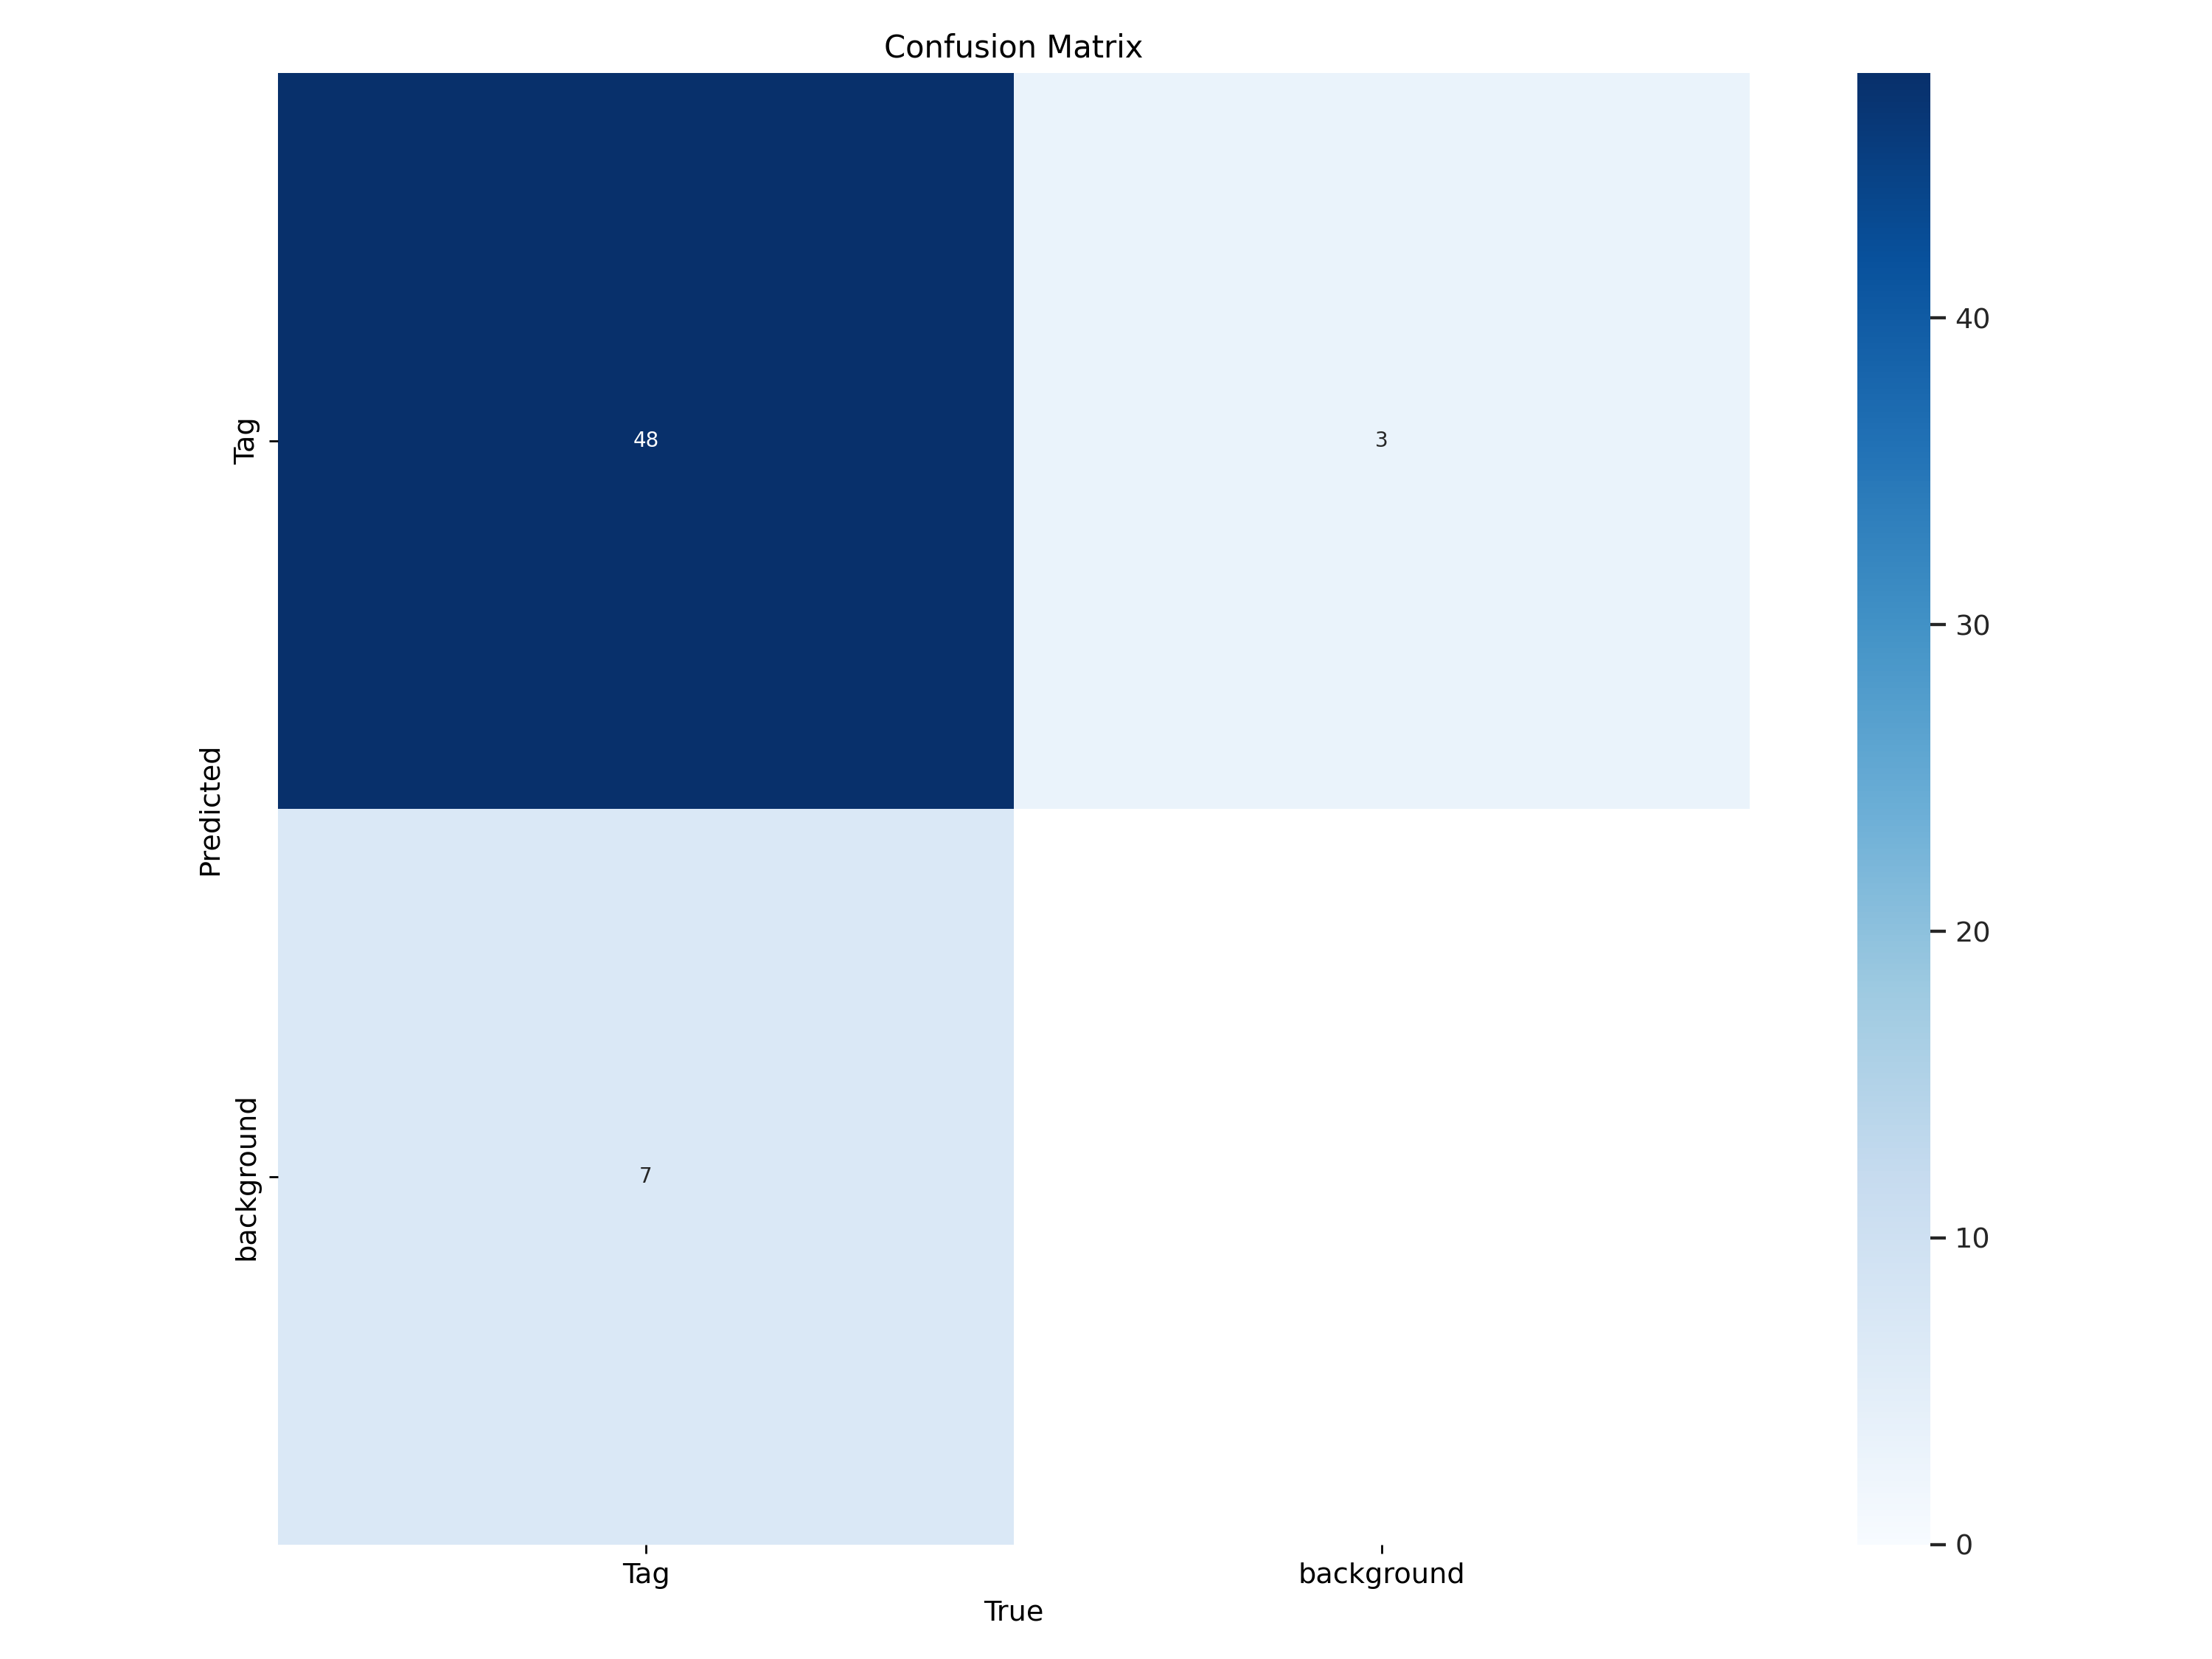

In [ ]:
from IPython.display import Image
Image(filename='/content/runs/detect/train/confusion_matrix.png', width=600)

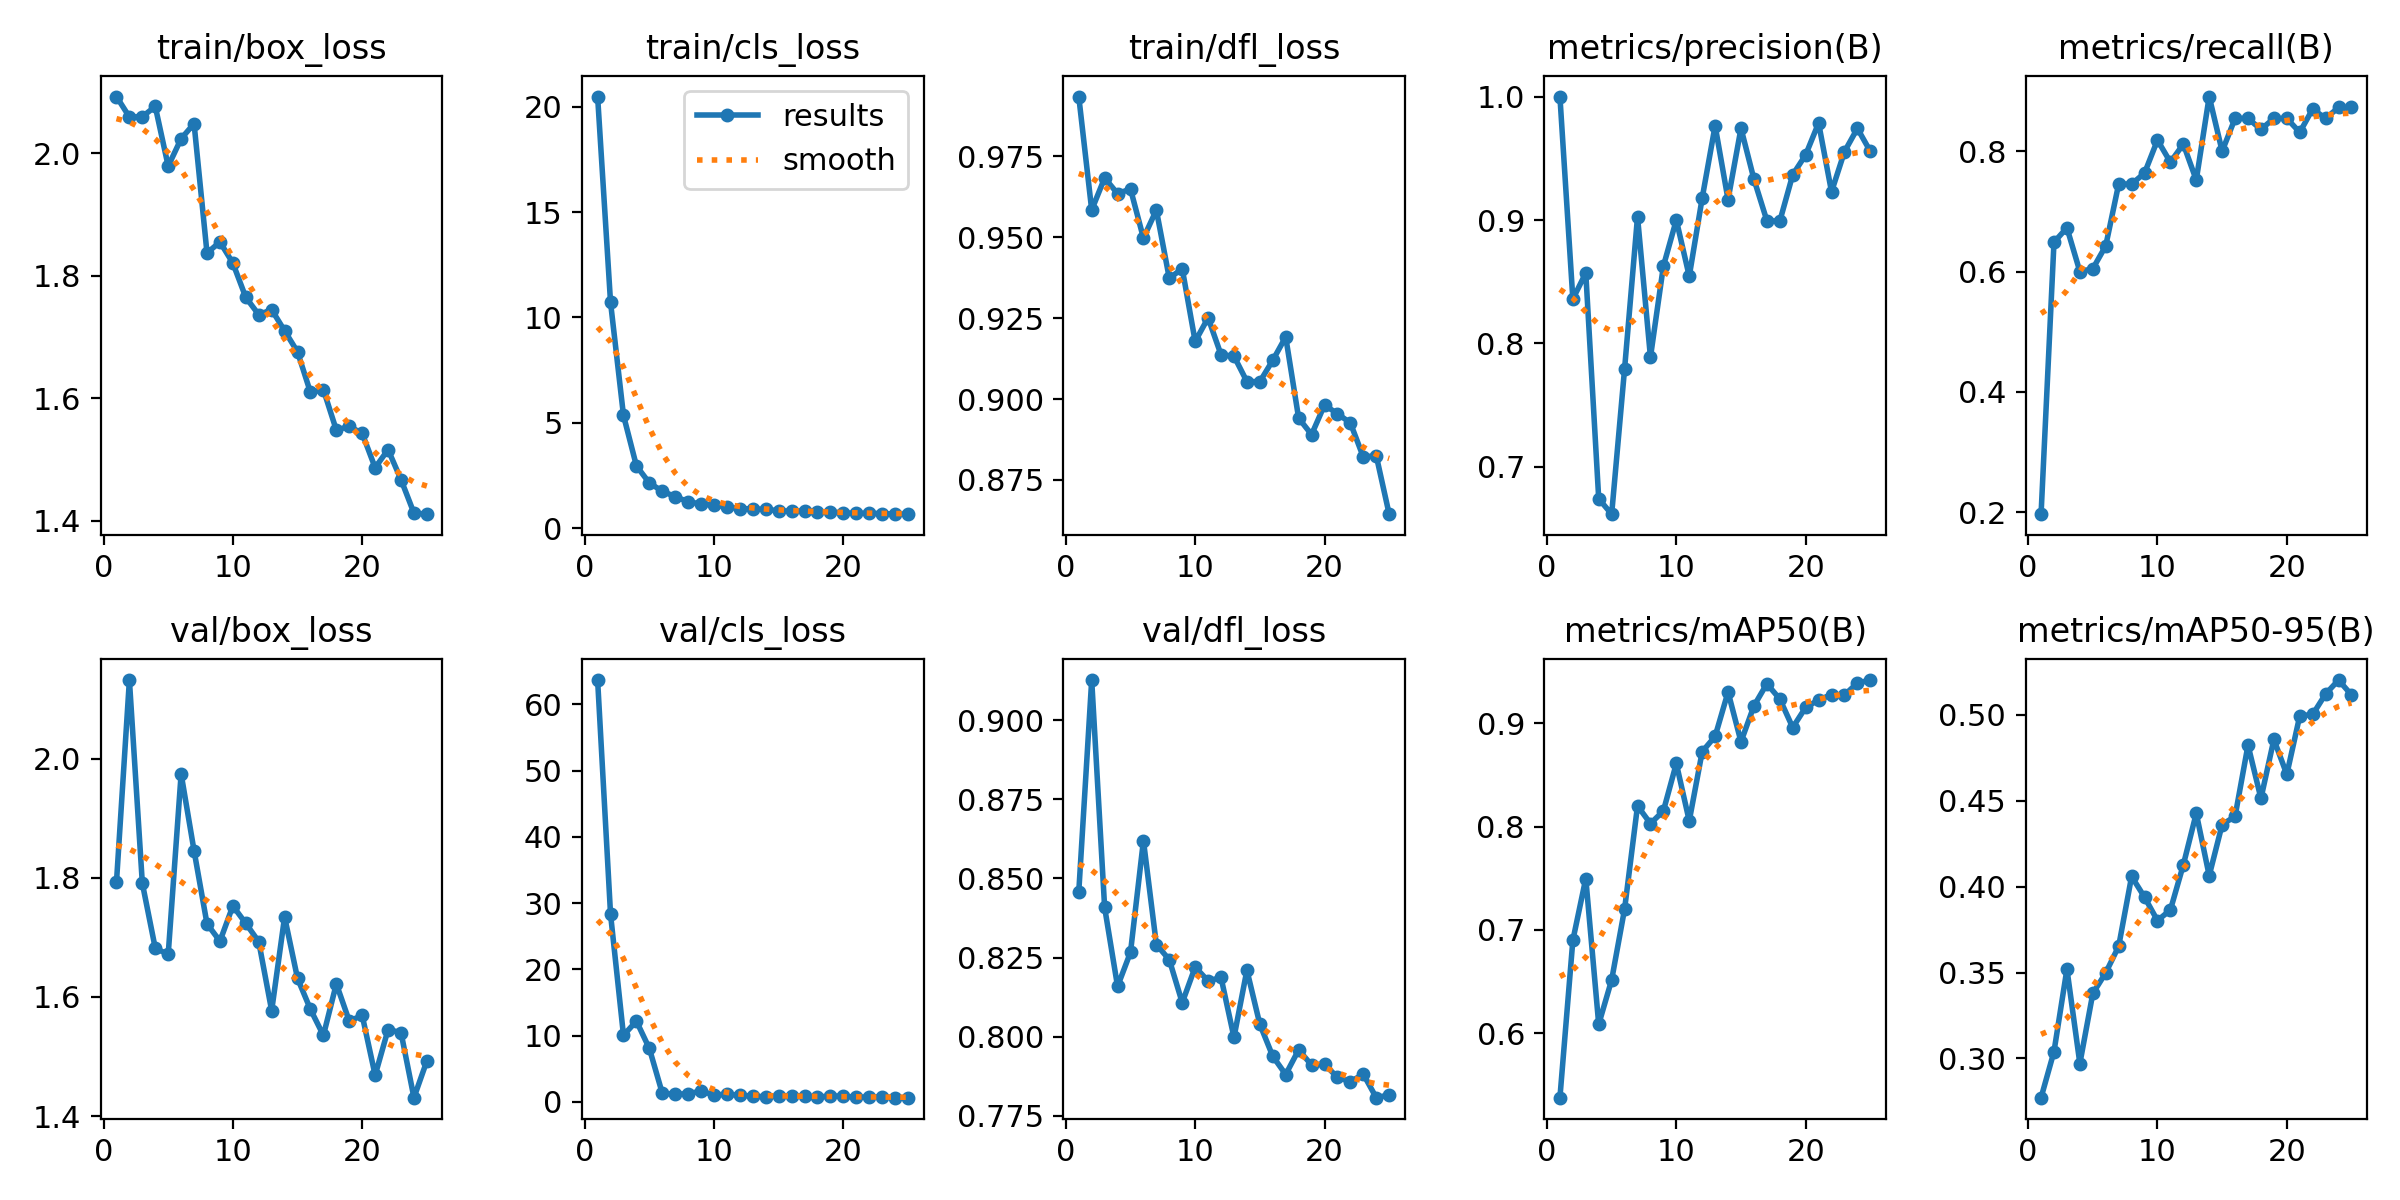

In [ ]:
Image(filename='/content/runs/detect/train/results.png', width=600)

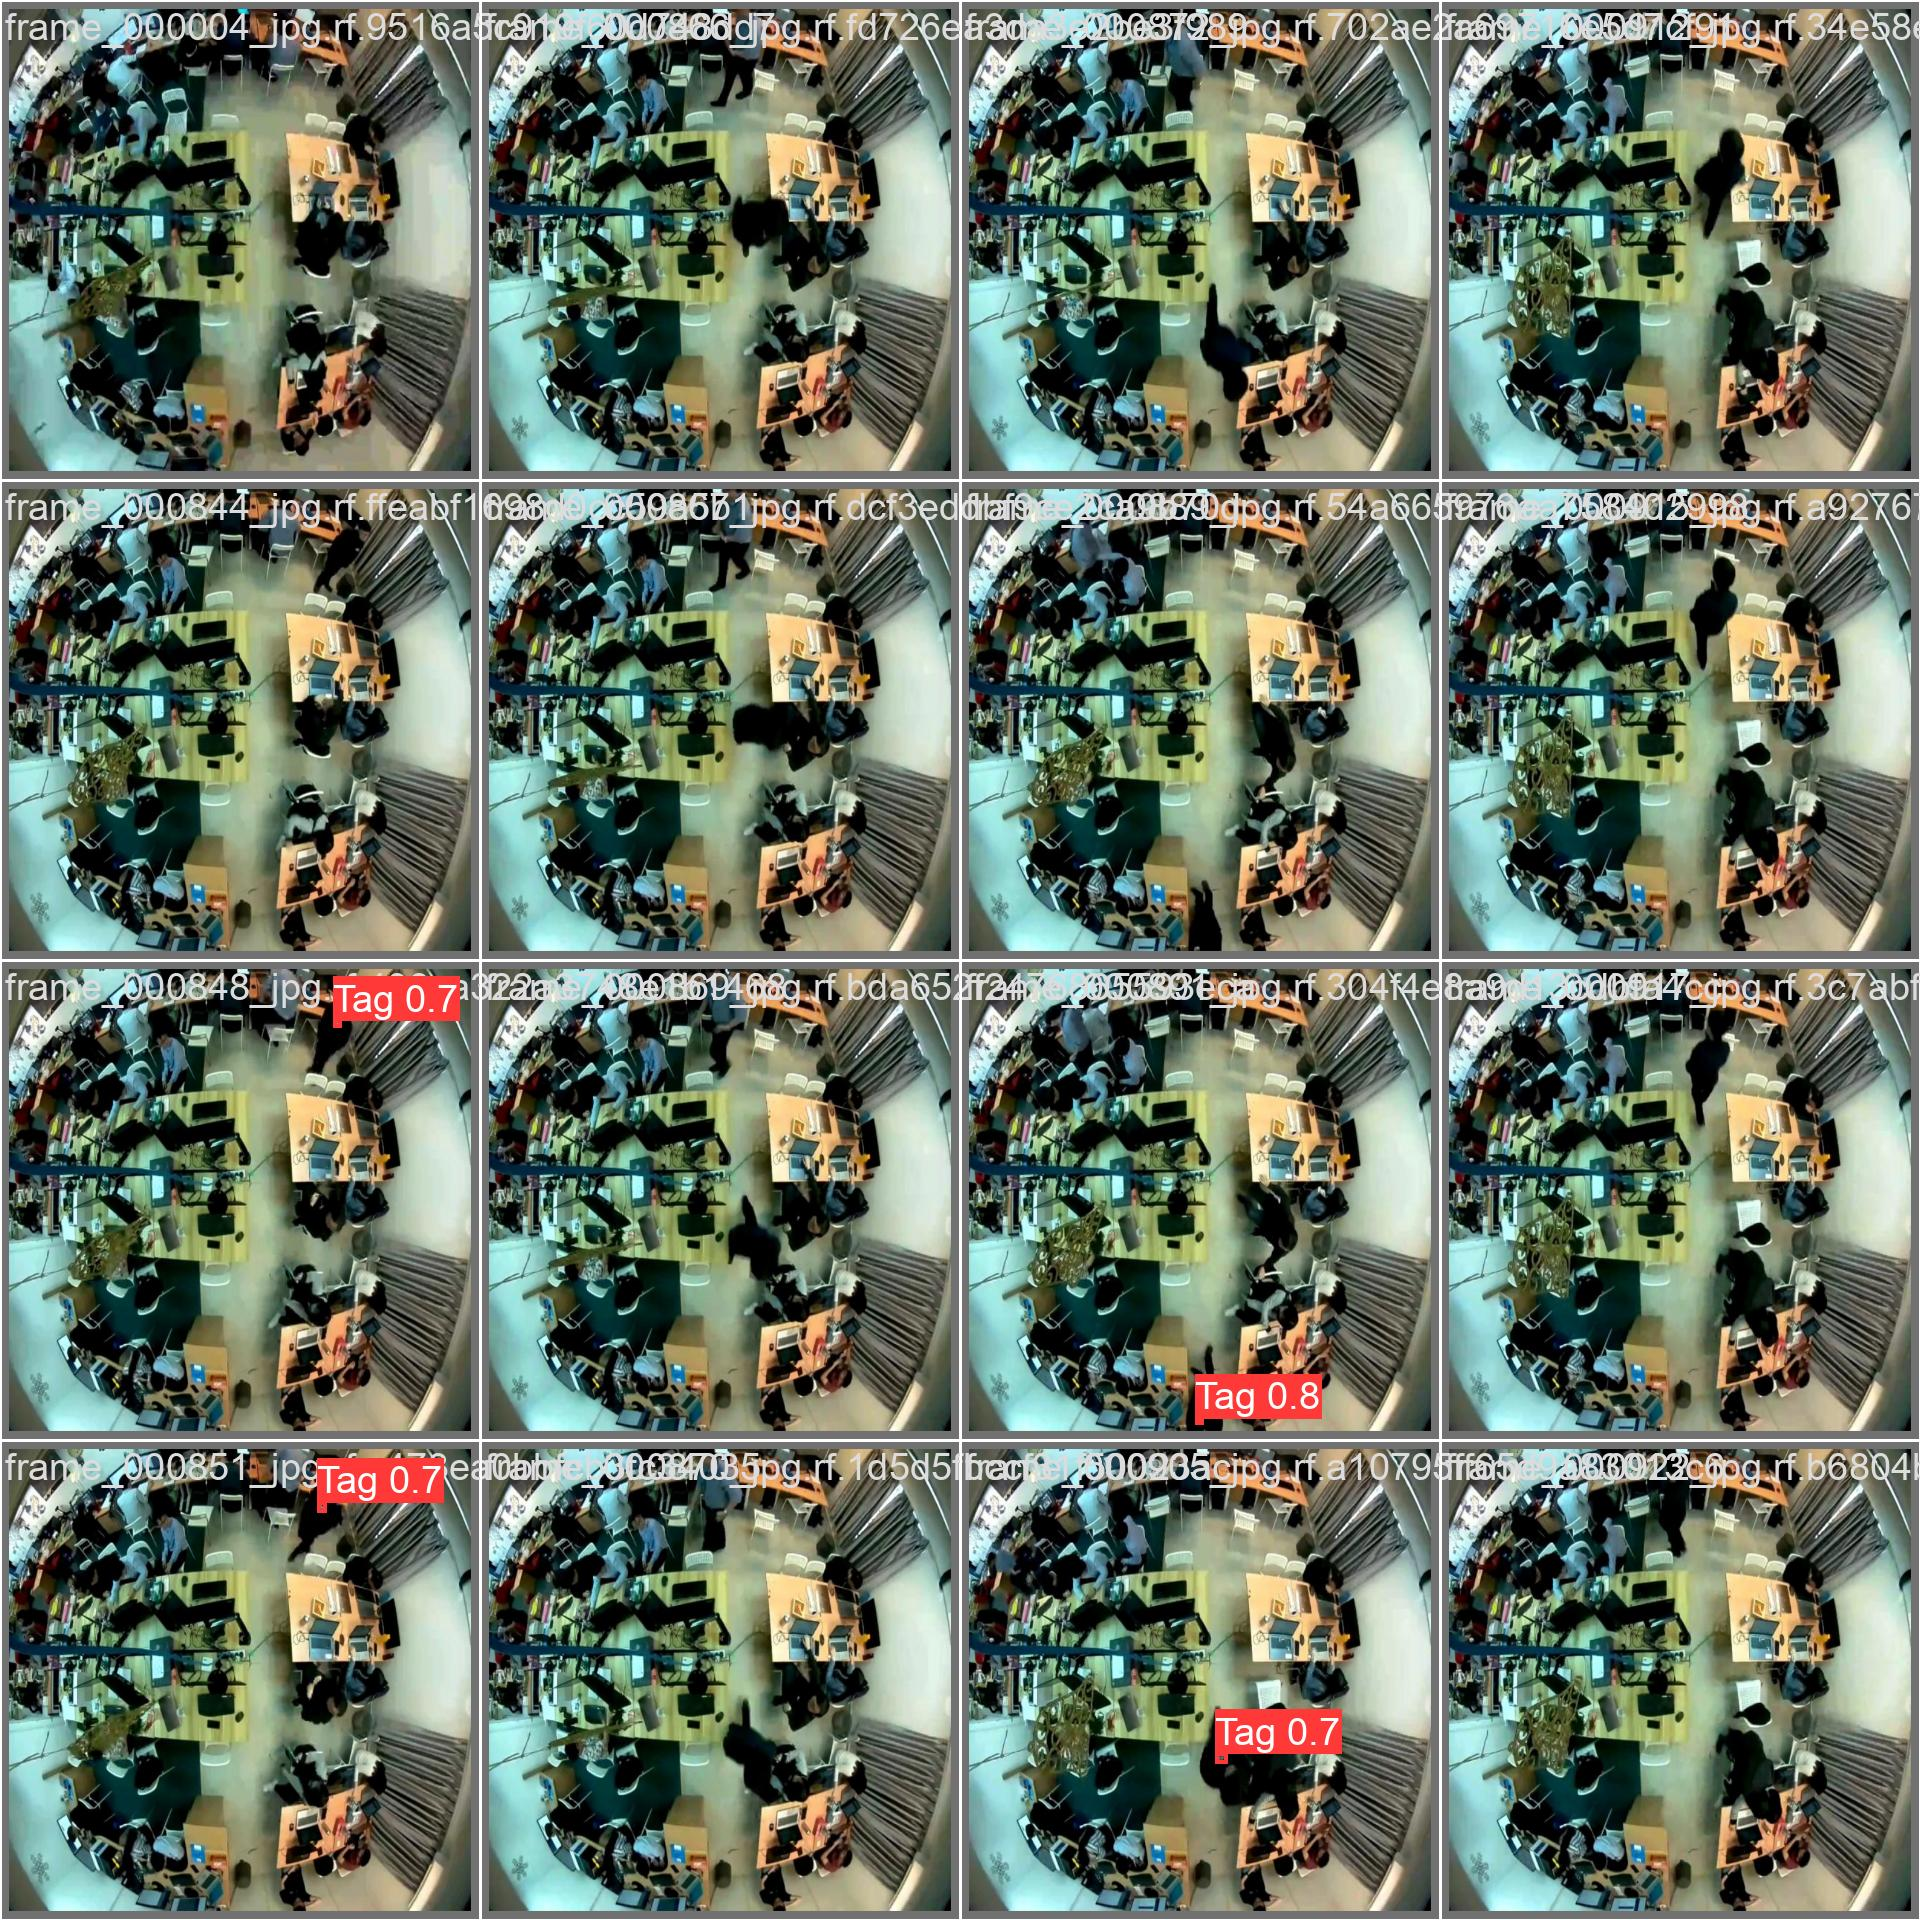

In [ ]:
Image(filename='/content/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validating

In [ ]:
%cd {HOME}
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/Tag-1/data.yaml

/content/Tag-1
Ultralytics YOLOv8.0.222 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/Tag-1/valid/labels.cache... 268 images, 213 backgrounds, 0 corrupt: 100% 268/268 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 17/17 [00:06<00:00,  2.71it/s]
                   all        268         55      0.974      0.873      0.939      0.516
Speed: 5.2ms preprocess, 8.1ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


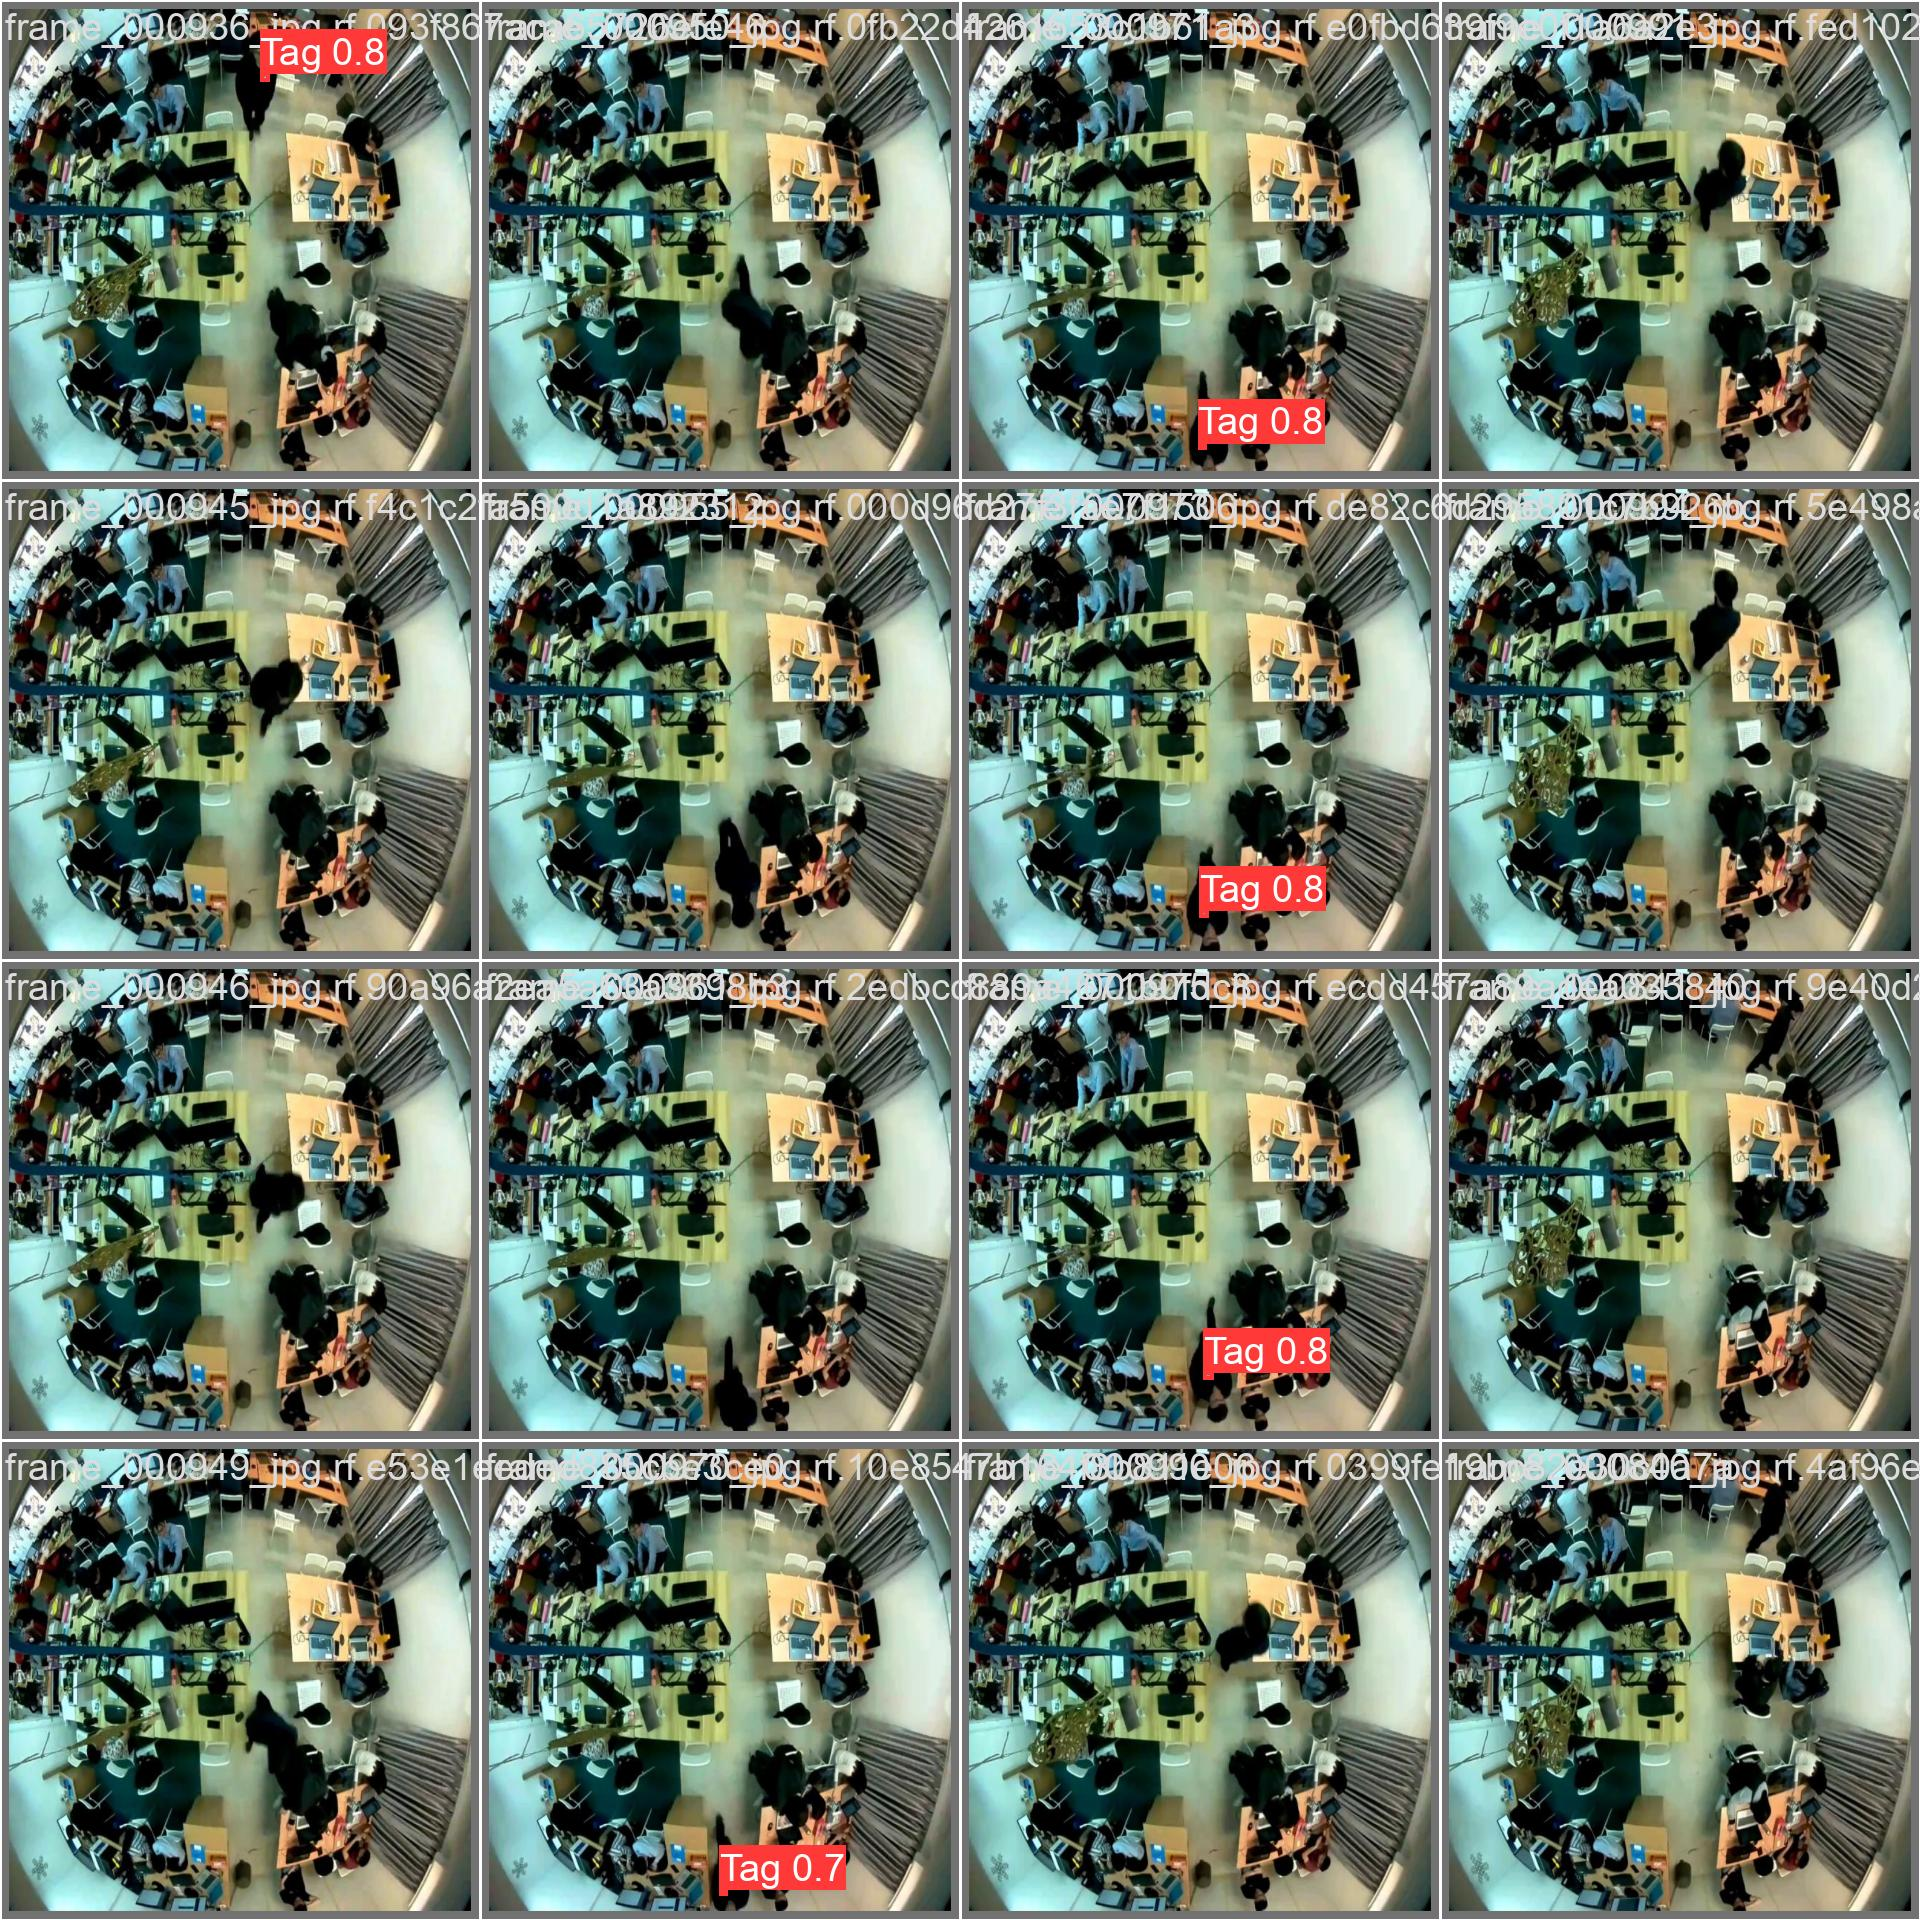

In [ ]:
Image(filename='/content/Tag-1/runs/detect/val/val_batch1_pred.jpg', width=600)

## Inference

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images

/content/Tag-1
Ultralytics YOLOv8.0.222 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/134 /content/Tag-1/test/images/frame_000005_jpg.rf.2458f4505e317b7c1f22585ddde9701f.jpg: 800x800 (no detections), 10.1ms
image 2/134 /content/Tag-1/test/images/frame_000008_jpg.rf.497c76a288b4ad31ee9caaf13d9e39b4.jpg: 800x800 (no detections), 12.1ms
image 3/134 /content/Tag-1/test/images/frame_000010_jpg.rf.ed3e7394fc01d9b4d50963e8b54d3b9c.jpg: 800x800 (no detections), 10.2ms
image 4/134 /content/Tag-1/test/images/frame_000011_jpg.rf.84e46a4eb637ee2e7f1dd8d677920e93.jpg: 800x800 (no detections), 10.0ms
image 5/134 /content/Tag-1/test/images/frame_000013_jpg.rf.255593ae63495002e6d78423631a6f3a.jpg: 800x800 (no detections), 9.9ms
image 6/134 /content/Tag-1/test/images/frame_000022_jpg.rf.c86c58b8cf3bc5f83681d67462fe4231.jpg: 800x800 (no detections), 9.9ms
image 7/134 /content/Tag-1/test/images/frame_

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'%cd {HOME}/runs/detect/predict3/*.jpg')[:1]:
  display(Image(filename=image_path, width=600))
  print('\n')

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source=/content/sample.mp4

/content/Tag-1
Ultralytics YOLOv8.0.222 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

video 1/1 (1/1341) /content/sample.mp4: 608x800 (no detections), 96.3ms
video 1/1 (2/1341) /content/sample.mp4: 608x800 (no detections), 8.1ms
video 1/1 (3/1341) /content/sample.mp4: 608x800 (no detections), 8.0ms
video 1/1 (4/1341) /content/sample.mp4: 608x800 (no detections), 8.0ms
video 1/1 (5/1341) /content/sample.mp4: 608x800 (no detections), 8.1ms
video 1/1 (6/1341) /content/sample.mp4: 608x800 (no detections), 8.2ms
video 1/1 (7/1341) /content/sample.mp4: 608x800 (no detections), 8.1ms
video 1/1 (8/1341) /content/sample.mp4: 608x800 (no detections), 8.1ms
video 1/1 (9/1341) /content/sample.mp4: 608x800 (no detections), 8.1ms
video 1/1 (10/1341) /content/sample.mp4: 608x800 (no detections), 8.1ms
video 1/1 (11/1341) /content/sample.mp4: 608x800 (no detections), 8.1ms
video 1/1 (12/1341) /content/samp

# People Detection Model

## Training

In [ ]:
!pip install roboflow
!pip install ultralytics

from roboflow import Roboflow
rf = Roboflow(api_key="xxx")
project = rf.workspace("ml-dutso").project("employee-nwknf")
dataset = project.version(1).download("yolov8")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 837.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.6 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninst

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 654.0/654.0 kB 3.2 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.222, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Employee-1 in yolov8:: 100%|██████████| 6406/6406 [00:01<00:00, 5345.21it/s]


In [ ]:
HOME = '/content/Employee-1'
!cd {HOME}

!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=25 imgsz=800

Ultralytics YOLOv8.0.222 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Employee-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=to

In [ ]:
!ls /content/runs/detect/train3

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1701739575.1bd0fcfb167c.2492.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2625.jpg  val_batch2_pred.jpg
labels.jpg					    train_batch2626.jpg  weights
P_curve.png					    train_batch2627.jpg
PR_curve.png					    train_batch2.jpg


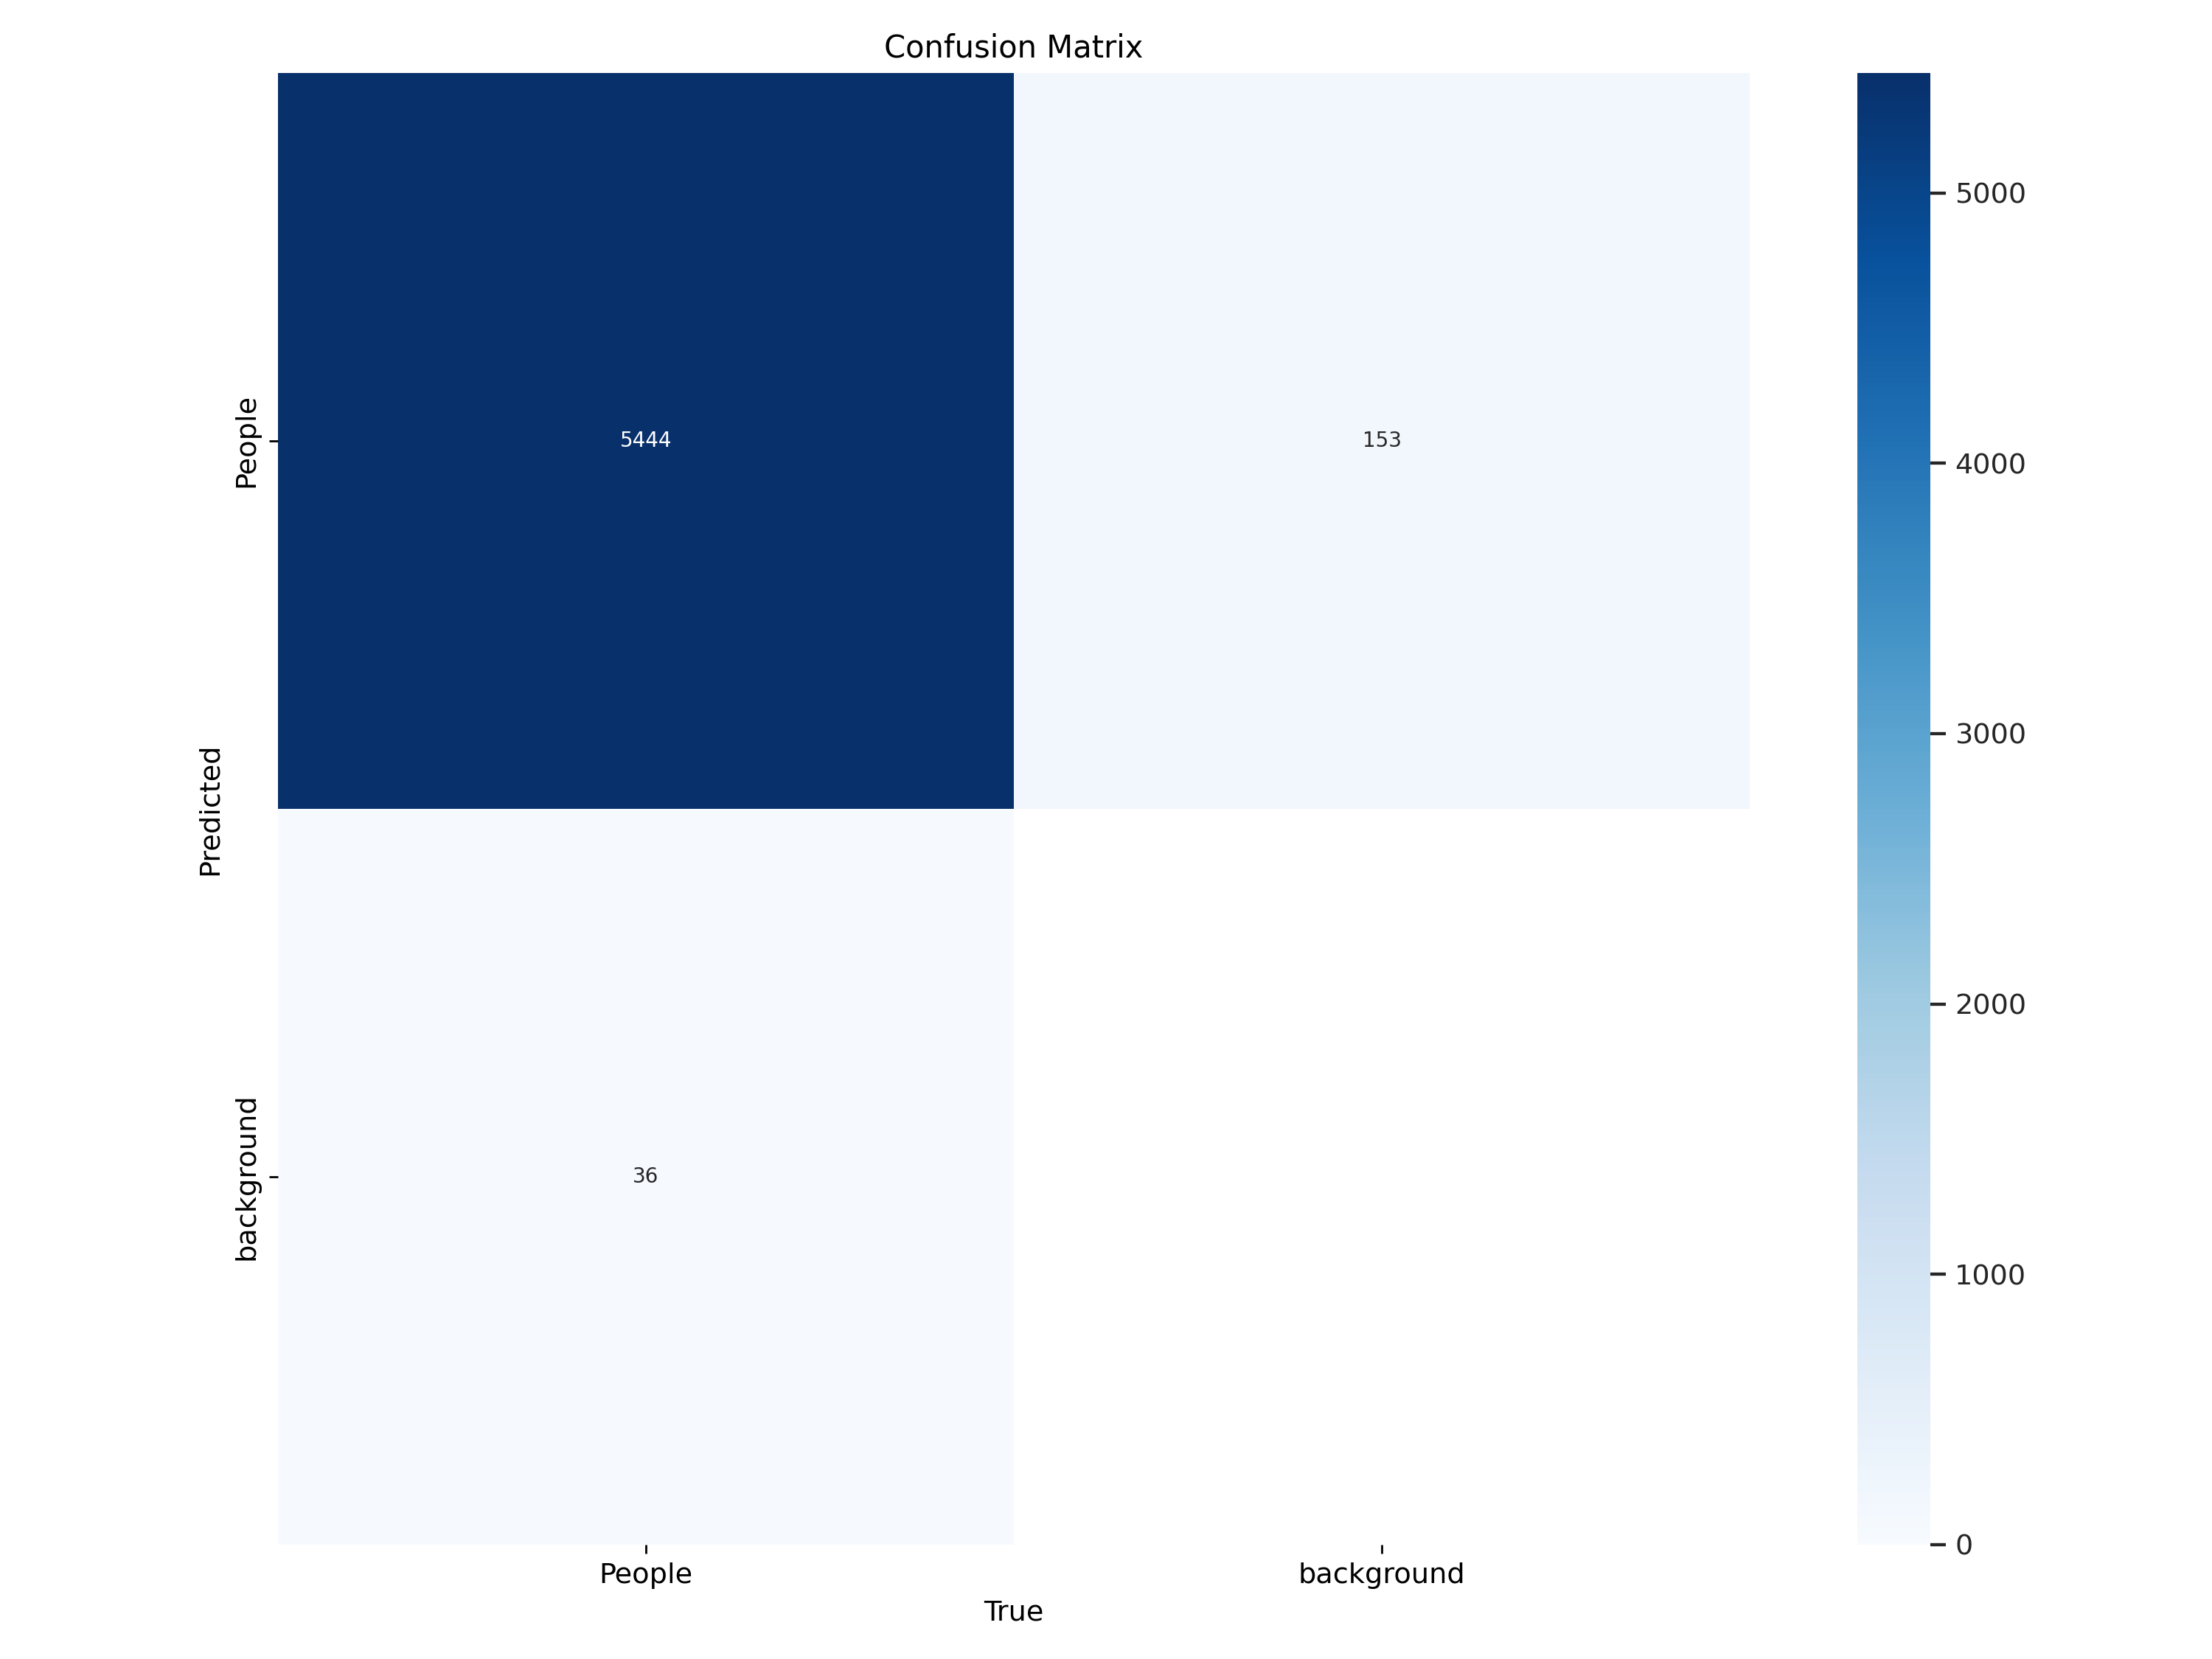

In [ ]:
from IPython.display import Image
Image(filename='/content/runs/detect/train3/confusion_matrix.png', width=600)

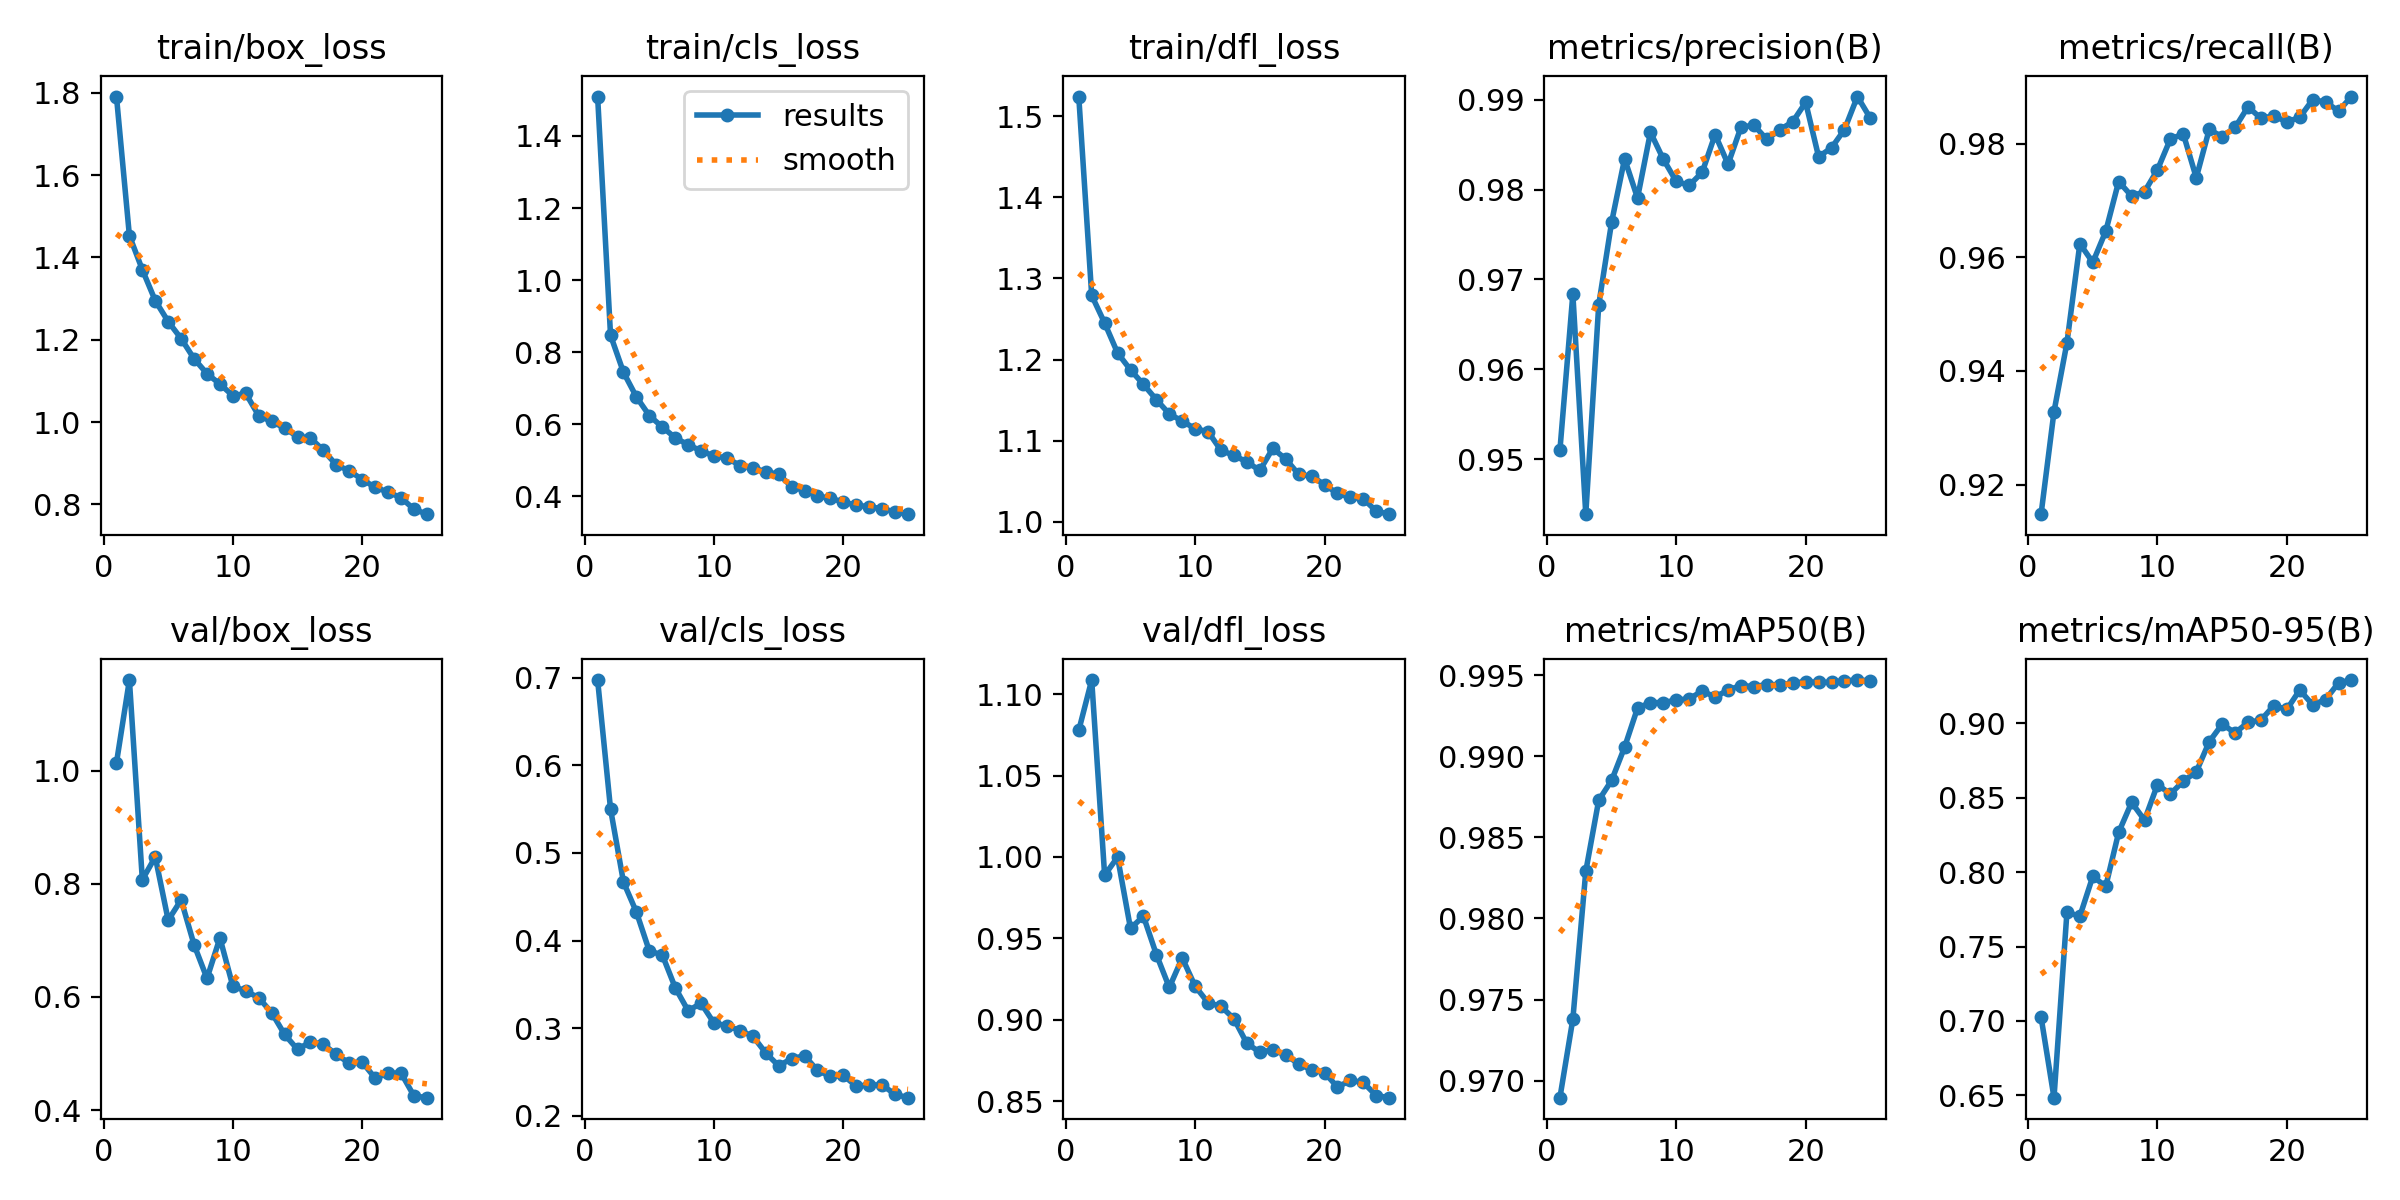

In [ ]:
Image(filename='/content/runs/detect/train3/results.png', width=600)

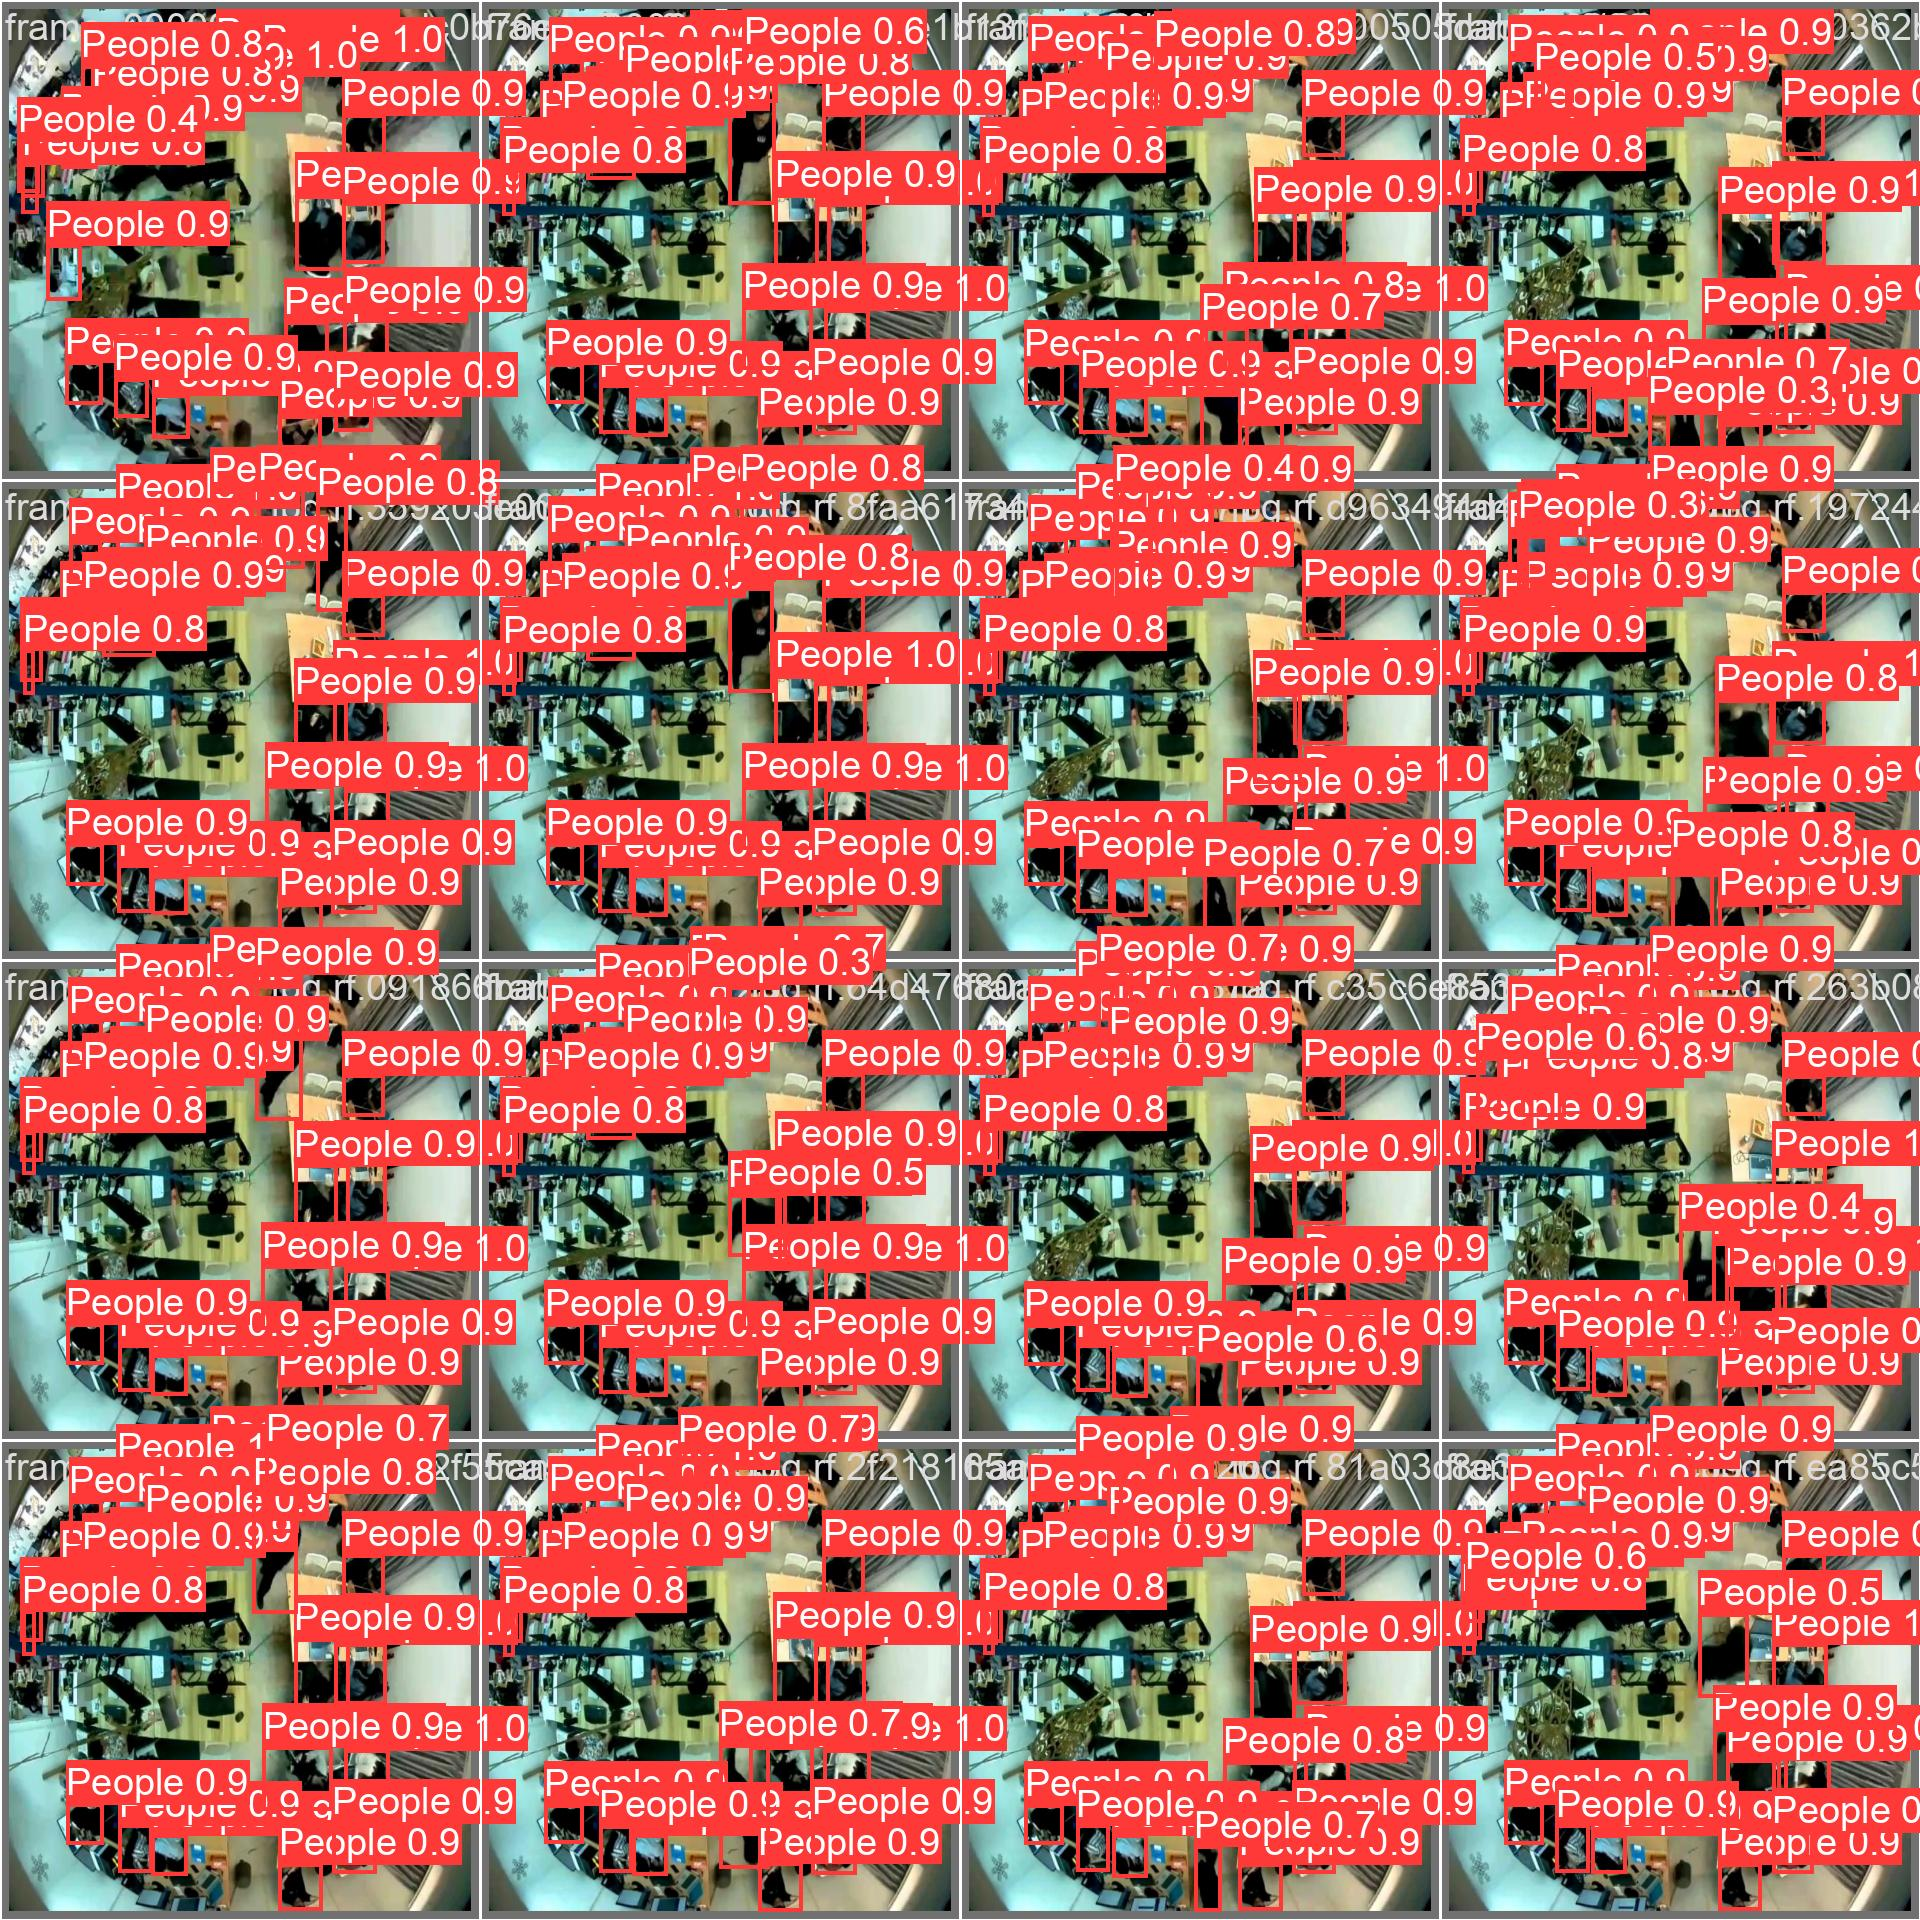

In [ ]:
Image(filename='/content/runs/detect/train3/val_batch0_pred.jpg', width=600)

## Validating

In [ ]:
%cd {HOME}
!yolo task=detect mode=val model=/content/runs/detect/train3/weights/best.pt data=/content/Employee-1/data.yaml

/content/Employee-1
Ultralytics YOLOv8.0.222 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/Employee-1/valid/labels.cache... 266 images, 0 backgrounds, 0 corrupt: 100% 266/266 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 17/17 [00:19<00:00,  1.15s/it]
                   all        266       5480      0.988      0.988      0.995      0.931
Speed: 2.9ms preprocess, 7.5ms inference, 0.0ms loss, 3.4ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


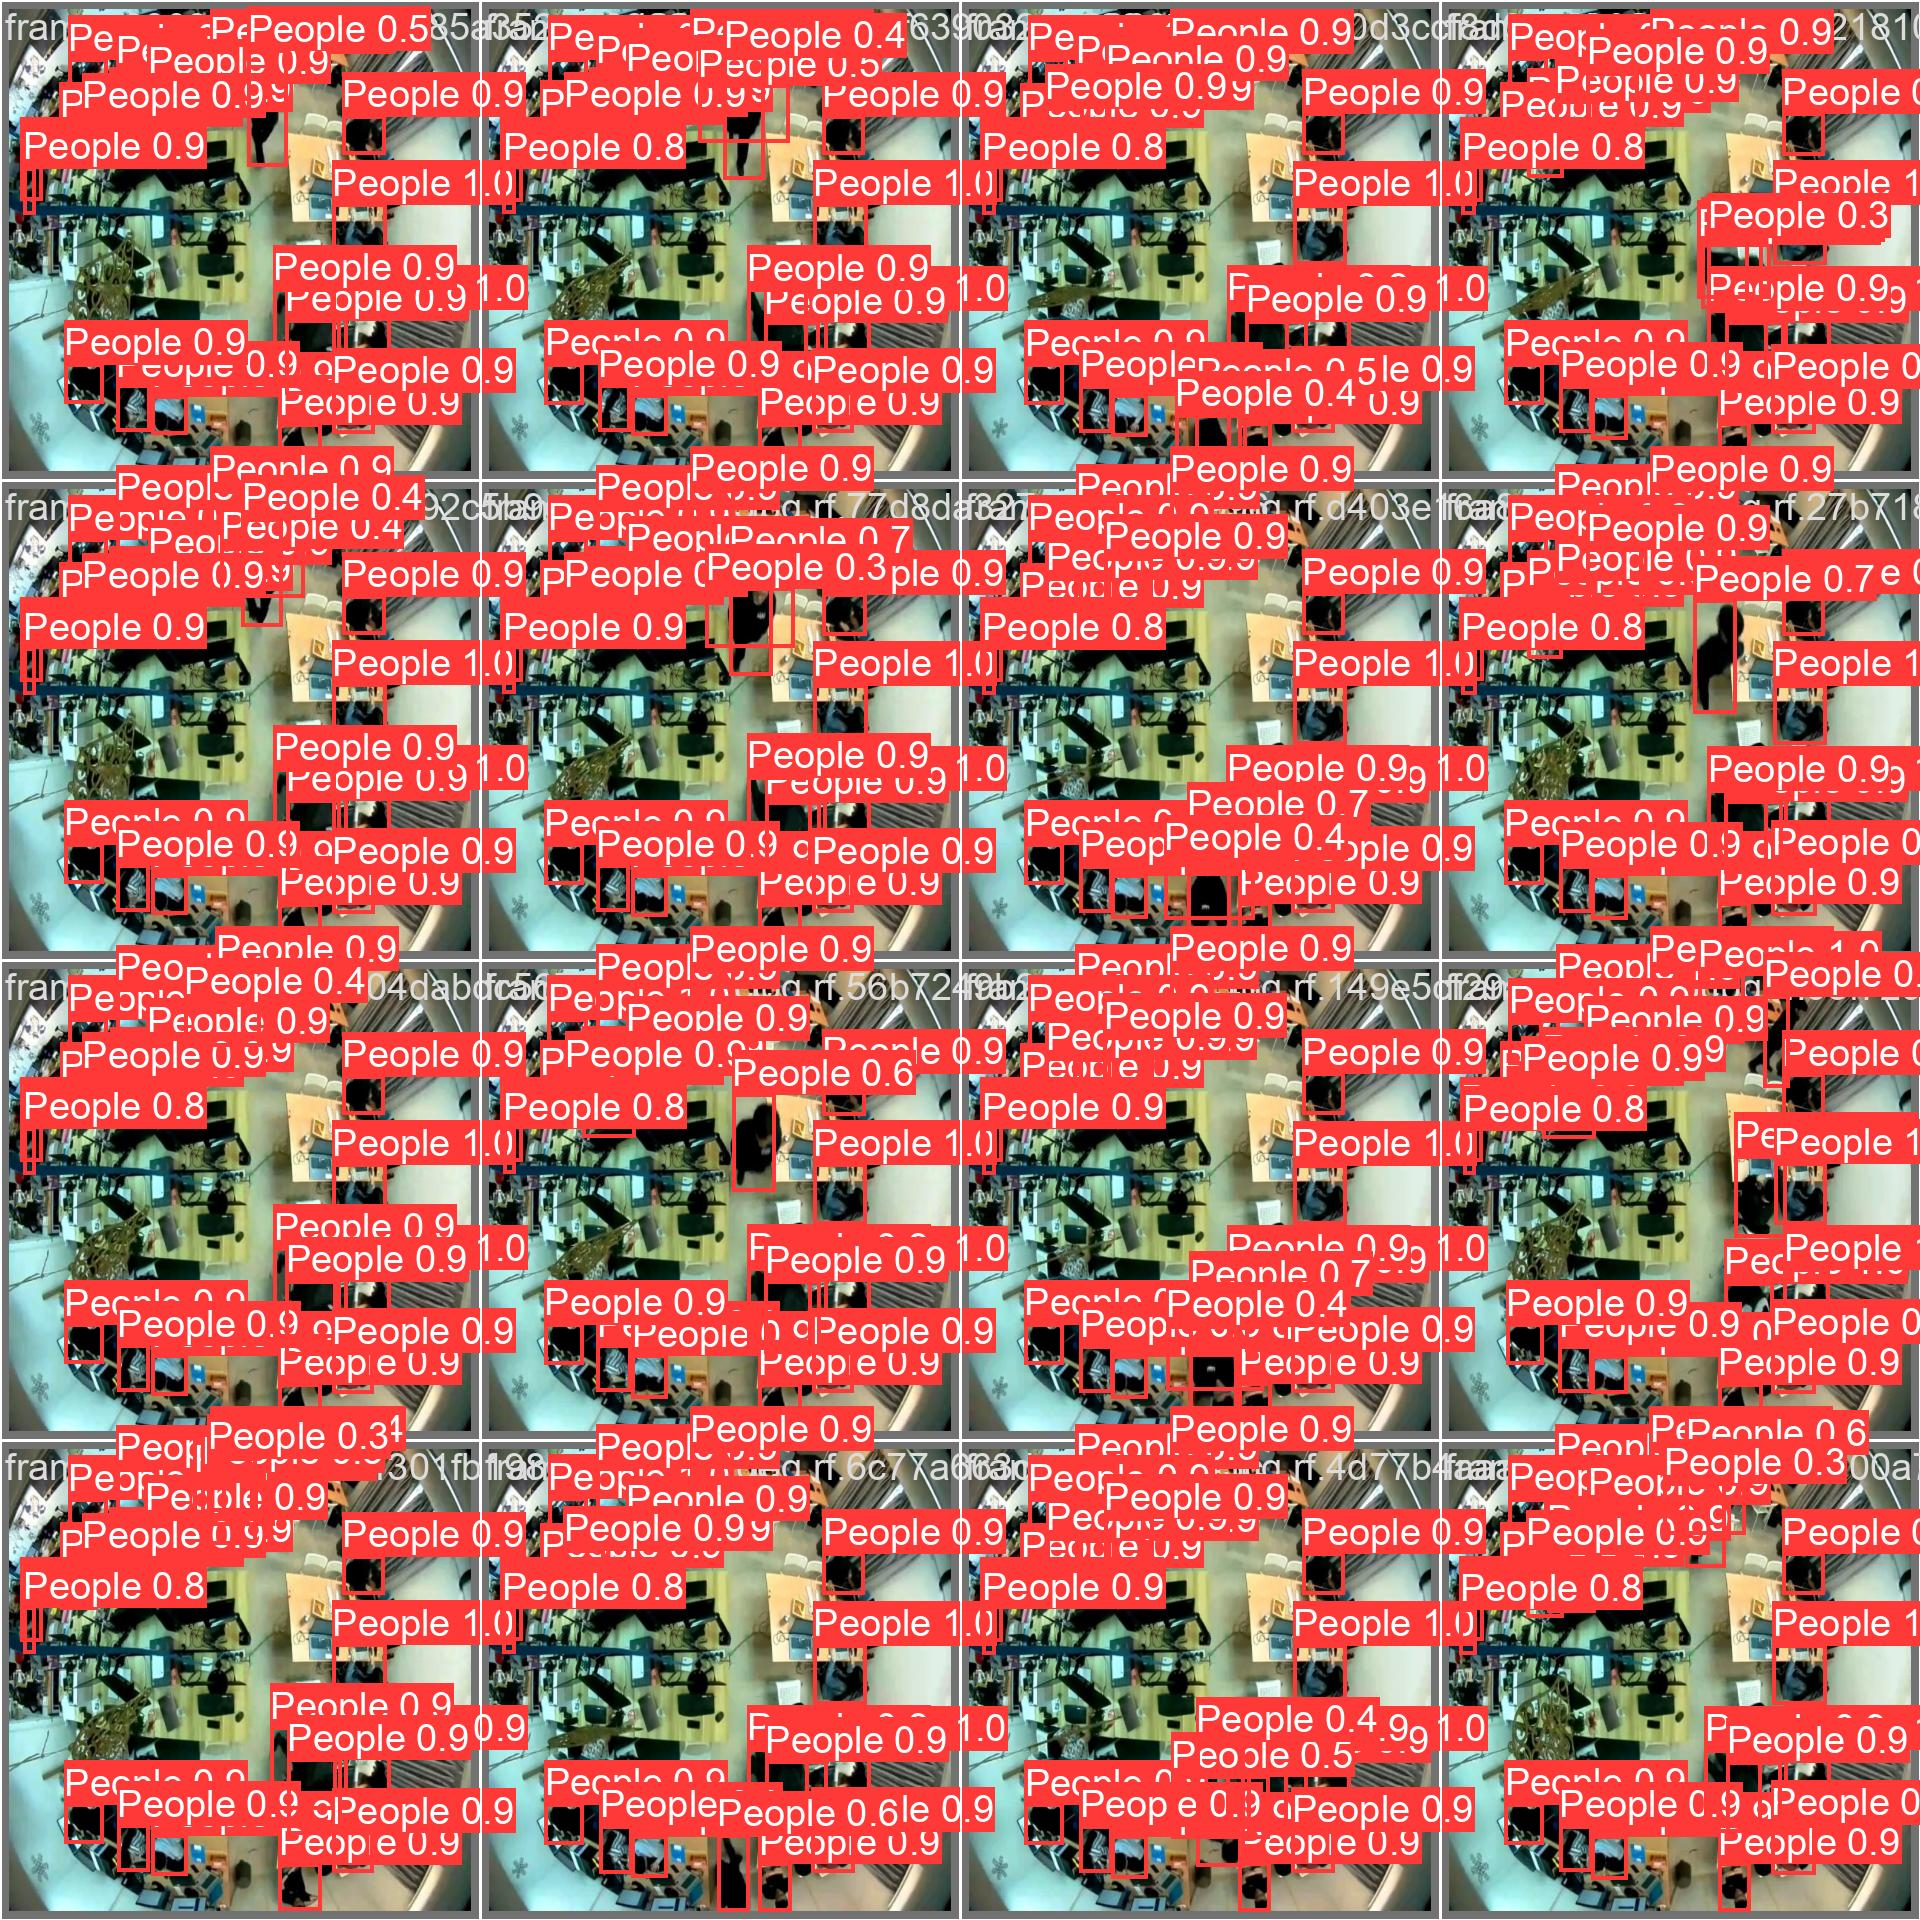

In [ ]:
Image(filename='/content/Employee-1/runs/detect/val/val_batch1_pred.jpg', width=600)

## Inference

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=/content/runs/detect/train3/weights/best.pt conf=0.25 source={dataset.location}/test/images

/content/Employee-1
Ultralytics YOLOv8.0.222 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/132 /content/Employee-1/test/images/frame_000003_jpg.rf.0c977265fdadc193b79d78a1c33c1e59.jpg: 800x800 22 Peoples, 9.9ms
image 2/132 /content/Employee-1/test/images/frame_000004_jpg.rf.0e72d90d927c65ec2d93924146915836.jpg: 800x800 21 Peoples, 12.7ms
image 3/132 /content/Employee-1/test/images/frame_000014_jpg.rf.3ae103cdd5a36c2f3ee98d5a5dad74ce.jpg: 800x800 21 Peoples, 9.9ms
image 4/132 /content/Employee-1/test/images/frame_000017_jpg.rf.f4d72352c0eeb71788a4230ff9c87e56.jpg: 800x800 21 Peoples, 9.9ms
image 5/132 /content/Employee-1/test/images/frame_000040_jpg.rf.8c1897fecb3166909d307e4151795394.jpg: 800x800 22 Peoples, 9.9ms
image 6/132 /content/Employee-1/test/images/frame_000059_jpg.rf.38b43184335e0b35befefebcdefbc7b3.jpg: 800x800 20 Peoples, 9.9ms
image 7/132 /content/Employee-1/test/images

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'%cd /content/Employee-1/runs/detect/predict/*.jpg')[:1]:
  display(Image(filename=image_path, width=600))
  print('\n')

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=/content/runs/detect/train3/weights/best.pt conf=0.25 source=/content/sample.mp4

/content/Employee-1
Ultralytics YOLOv8.0.222 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

video 1/1 (1/1341) /content/sample.mp4: 608x800 22 Peoples, 82.7ms
video 1/1 (2/1341) /content/sample.mp4: 608x800 22 Peoples, 8.1ms
video 1/1 (3/1341) /content/sample.mp4: 608x800 23 Peoples, 8.1ms
video 1/1 (4/1341) /content/sample.mp4: 608x800 22 Peoples, 8.0ms
video 1/1 (5/1341) /content/sample.mp4: 608x800 21 Peoples, 8.1ms
video 1/1 (6/1341) /content/sample.mp4: 608x800 20 Peoples, 8.0ms
video 1/1 (7/1341) /content/sample.mp4: 608x800 21 Peoples, 8.1ms
video 1/1 (8/1341) /content/sample.mp4: 608x800 22 Peoples, 8.1ms
video 1/1 (9/1341) /content/sample.mp4: 608x800 21 Peoples, 8.1ms
video 1/1 (10/1341) /content/sample.mp4: 608x800 21 Peoples, 8.1ms
video 1/1 (11/1341) /content/sample.mp4: 608x800 21 Peoples, 8.1ms
video 1/1 (12/1341) /content/sample.mp4: 608x800 21 Peoples, 9.5ms
video 1/1 (13/13